# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Nadira Maysa Dyandra
- **Email:** m010d4kx2387@bangkit.academy
- **ID Dicoding:** dyandramaysa

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: <br>
  **"Bagaimana pola peminjaman sepeda berubah sepanjang musim di Washington D.C. dari tahun 2011 hingga 2012?"**
- Pertanyaan 2: <br>
 **"Bagaimana cuaca mempengaruhi jumlah peminjaman sepeda di Washington D.C.?"**
- Pertanyaan 3: <br>
  **Bagaimana hari libur, weekend dan hari kerja mempengaruhi peminjaman sepeda di washington DC?**


## Import Semua Packages/Library yang Digunakan

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

Pada tahap ini, akan dikumpulkan semua data yang dibutuhkan untuk **Bike Sharing Dataset**: https://drive.google.com/file/d/1RaBmV6Q6FYWU4HWZs80Suqd7KQC34diQ/view

<br>
Selanjutnya akan dilihat 5 data teratas dari masing-masing dataframe untuk memastikan bahwa data yang dimuat sudah benar.

**Memuat tabel day**

In [44]:
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Memuat tabel hour**

In [45]:
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

Pada tahap ini, akan dilakukan penilaian terhadap kualitas dari seluruh data yang digunakan.

#### day_df

##### Tipe data & Missing Value

In [46]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Hal yang dilihat:
* **Tidak ditemukan** adanya missing value pada dataframe day_df, sehingga nantinya **tidak** **diperlukan** adanya penanganan terhadap missing value pada tahap data cleaning.
* Terdapat kesalah tipe data untuk kolom **dteday** yang berisi tanggal namun bertipe object, sehingga nantinya **diperlukan** adanya penanganan terhadap tipe data pada tahap data cleaning.

##### Duplikasi Data

In [47]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Dapat dilihat bahwa **tidak ditemukan** adanya duplikasi data pada dataframe day_df, sehingga nantinya **tidak** diperlukan adanya penanganan terhadap duplikasi data pada tahap data cleaning.

#### Innacurate Value

In [48]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Dapat dilihat bahwa tidak terdapat keanehan pada nilai maksimum dan minimum pada setiap kolom.

#### hour_df

##### Tipe data & Missing Value

In [49]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Hal yang dilihat:
* **Tidak ditemukan** adanya missing value pada dataframe hour_df, sehingga nantinya **tidak** **diperlukan** adanya penanganan terhadap missing value pada tahap data cleaning.
* Terdapat kesalah tipe data untuk kolom **dteday** yang berisi tanggal namun bertipe object, sehingga nantinya **diperlukan** adanya penanganan terhadap tipe data pada tahap data cleaning.

##### Duplikasi Data

In [50]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Dapat dilihat bahwa **tidak ditemukan** adanya duplikasi data pada dataframe hour_df, sehingga nantinya **tidak** diperlukan adanya penanganan terhadap duplikasi data pada tahap data cleaning.

#### Innacurate Value

In [51]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Dapat dilihat bahwa tidak terdapat keanehan pada nilai maksimum dan minimum pada setiap kolom.

### Cleaning Data

Pada tahap ini akan dibersihkan berbagai masalah yang telah teridentifikasi dalam proses assessing data.

#### Menangani kesalahan tipe data

**day_df**

In [52]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])

Untuk memastikan hal ini berjalan sesuai harapan, diperlukan pemeriksaan kembali tipe data.

In [53]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**hour_df**

In [54]:
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

Untuk memastikan hal ini berjalan sesuai harapan, diperlukan pemeriksaan kembali tipe data.

In [55]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Dapat dilihat bahwa kolom **dteday** pada kedua dataframe sudah memiliki tipe data **datetime64[ns]**

## Exploratory Data Analysis (EDA)

Untuk menjawab pertanyaan yang diajukan, cukup dengan menggunakan day_df karena itu merupakan akumulasi dari hour_df per harinya.

### Eksplorasi Data Pertanyaan 1

**"Bagaimana pola peminjaman sepeda berubah sepanjang musim di Washington D.C. dari tahun 2011 hingga 2012?"**

In [56]:
# Membuat dictionary untuk memetakan nilai season
season_mapping = {1: 'Springer', 2: 'Summer', 3: 'Fall', 4: 'Winter'}

# Membuat dictionary untuk memetakan nilai yr
yr_mapping = {0: 2011, 1: 2012}

# Melakukan operasi grup, mengurutkan, dan memetakan kembali nilai season dan yr
result = day_df.groupby(["season", "yr"])['cnt'].sum().reset_index().sort_values(by=['yr', 'cnt'], ascending=[True, False])
result['season'] = result['season'].map(season_mapping)
result['yr'] = result['yr'].map(yr_mapping)

result

,season,yr,cnt
4,Fall,2011,419650
2,Summer,2011,347316
6,Winter,2011,326137
0,Springer,2011,150000
5,Fall,2012,641479
3,Summer,2012,571273
7,Winter,2012,515476
1,Springer,2012,321348


Berdasarkan hasil di atas, dapat dilihat bahwa pola peminjaman sepeda di tiap tahunnya sama, yaitu paling banyak saat season Fall, di susul dengan Summer, Winter, dan paling sedikit ketika Springer. Selain itu, dapat dilihat bahwa terdapat peningkatan yang cukup signifikan terhadap jumlah sepeda yang dirental pada tahun 2012.

### Eksplorasi Data Pertanyaan 2

 **"Bagaimana cuaca mempengaruhi jumlah peminjaman sepeda di Washington D.C.?"**

In [57]:
# Membuat dictionary untuk memetakan nilai weathersit
weather_mapping = {1: 'Clear', 2: 'Mist', 3: 'Light Snow', 4: 'Heavy Rain'}

# Membuat dictionary untuk memetakan nilai yr
yr_mapping = {0: 2011, 1: 2012}

# Menggunakan fungsi agregat untuk menghitung jumlah sepeda yang dirental, nilai minimum, dan maksimum
result2 = day_df.groupby(["weathersit", "yr"]).agg({'cnt': ['sum', 'min', 'max']}).reset_index()
result2.columns = ['weathersit', 'year', 'total_rentals', 'min_rentals', 'max_rentals']

# Memetakan kembali nilai weathersit dan yr
result2['weathersit'] = result2['weathersit'].map(weather_mapping)
result2['year'] = result2['year'].map(yr_mapping)

# Mengurutkan hasil berdasarkan weathersit
result2 = result2.sort_values(by=['year', 'total_rentals'], ascending=[True, False])

result2

,weathersit,year,total_rentals,min_rentals,max_rentals
0,Clear,2011,835067,431,5923
2,Mist,2011,382924,605,6043
4,Light Snow,2011,25112,506,2765
1,Clear,2012,1422885,1529,8714
3,Mist,2012,613934,920,8362
5,Light Snow,2012,12757,22,4639


Berdasarkan hasil di atas, dapat dilihat bahwa cuaca sangat mempengaruhi jumlah rental sepeda di Washington DC. Yaitu, sepeda paling banyak dirental ketika cuaca sedang cerah, berkurang ketika cuaca berkabut, dan sangat sedikit dirental ketika cuaca bersalju.

### Eksplorasi Data Pertanyaan 3

**Bagaimana hari libur, weekend dan hari kerja mempengaruhi peminjaman sepeda di washington DC?**

Untuk menjawab pertanyaan ini, kita akan mengelompokkan data ke rental berdasarkan tipe harinya, yaitu Workday, Weekend, dan Holiday

In [58]:
# Membuat dictionary untuk memetakan nilai yr
yr_mapping = {0: 2011, 1: 2012}

# Membuat dataframe untuk informasi jenis hari
holiday_info = day_df[['dteday', 'yr', 'holiday', 'weekday', 'workingday']]
holiday_info = holiday_info.drop_duplicates().reset_index(drop=True)

# Menggunakan lambda function untuk menentukan jenis hari
holiday_info['day_type'] = holiday_info.apply(lambda row: 'Holiday' if row['holiday'] == 1 else ('Weekend' if row['workingday'] == 0 else 'Workday'), axis=1)

# Menggabungkan informasi jenis hari dengan data peminjaman sepeda
merged_df = pd.merge(day_df, holiday_info[['dteday', 'day_type']], on='dteday')

# Menghitung total peminjaman sepeda untuk setiap jenis hari dan tahun
rentals_by_day_type = merged_df.groupby(['yr', 'day_type'])['cnt'].sum().reset_index().sort_values(by=['yr', 'cnt'], ascending=[True, False])

rentals_by_day_type['yr'] = rentals_by_day_type['yr'].map(yr_mapping)

rentals_by_day_type


,yr,day_type,cnt
2,2011,Workday,856264
1,2011,Weekend,356817
0,2011,Holiday,30022
5,2012,Workday,1436146
4,2012,Weekend,565017
3,2012,Holiday,48413


Berdasarkan hasil di atas, dapat dilihat bahwa hari libur, weekend, dan hari kerja sangat mempengaruhi jumlah rental sepeda di Washington DC. Dapat dilihat bahwa, pengguna paling banyak meminjam sepeda ketika sedang hari kerja, disusul dengan weekend, dan paling sedikit ketika holiday.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

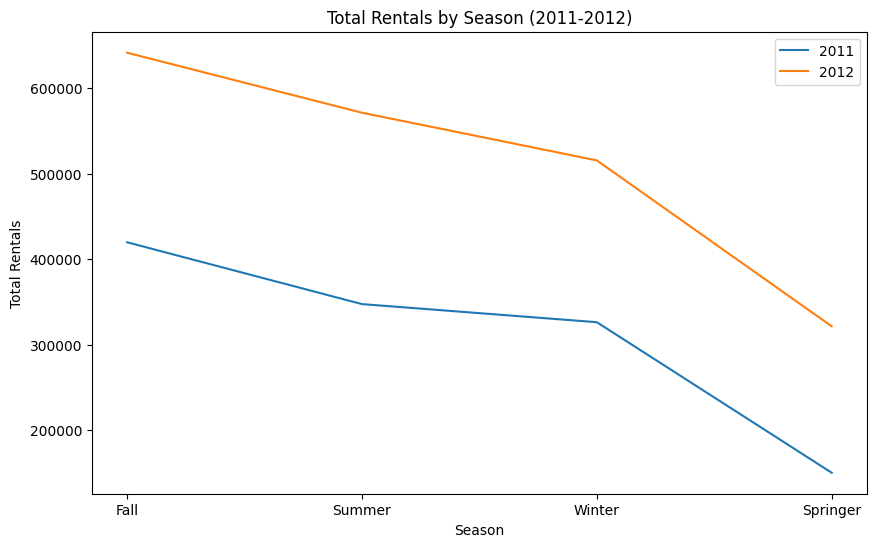

In [59]:
# Membuat visualisasi
plt.figure(figsize=(10, 6))

# Plot untuk tahun 2011
plt.plot(result[result['yr'] == 2011]['season'],
         result[result['yr'] == 2011]['cnt'], label='2011')

# Plot untuk tahun 2012
plt.plot(result[result['yr'] == 2012]['season'],
         result[result['yr'] == 2012]['cnt'], label='2012')

plt.title('Total Rentals by Season (2011-2012)')
plt.xlabel('Season')
plt.ylabel('Total Rentals')
plt.legend()
plt.show()

Jika diurutkan berdasarkan jumlah rental sepeda, dapat dilihat bahwa tren paling banyak rental sepeda saat season Fall dan paling rendah ketika Springer.

### Pertanyaan 2:

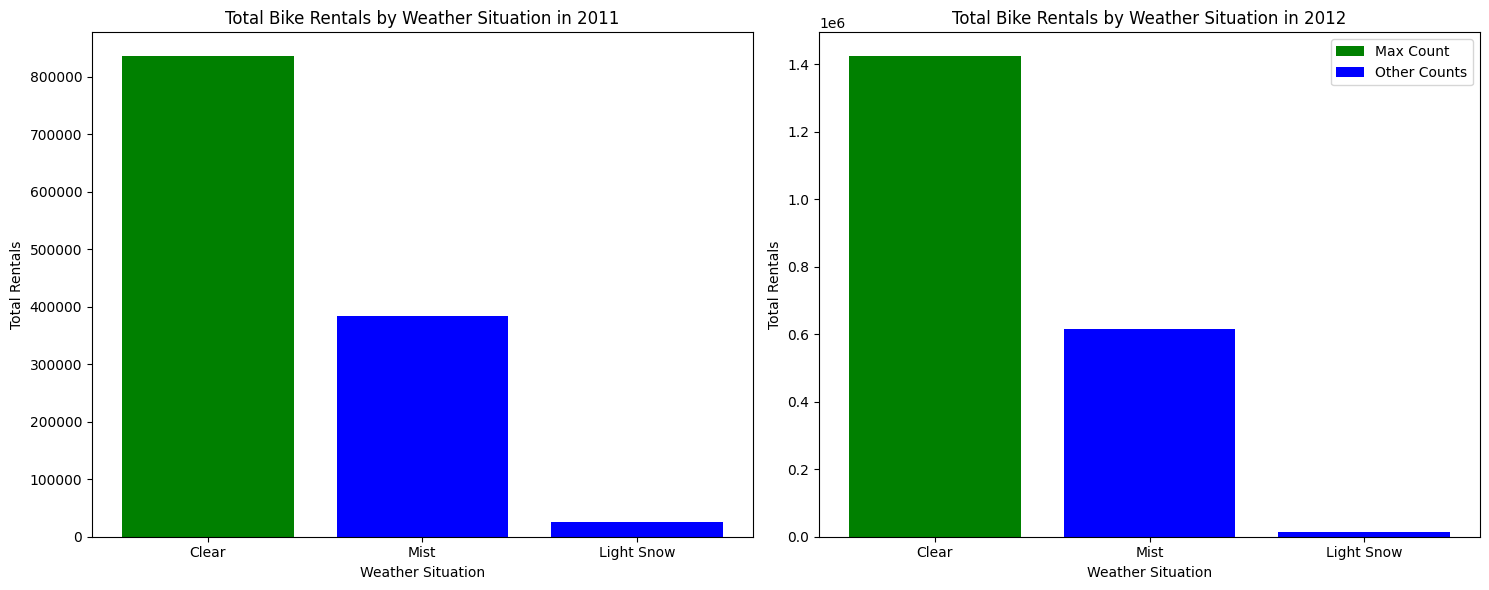

In [60]:
# Membuat figure untuk kedua plot
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Membuat data untuk tahun 2011
data_2011 = result2[result2['year'] == 2011]
max_count_2011 = data_2011['total_rentals'].max()

# Plot untuk tahun 2011
bars_2011 = axs[0].bar(data_2011['weathersit'], data_2011['total_rentals'], color=['green' if count == max_count_2011 else 'blue' for count in data_2011['total_rentals']])
axs[0].set_xlabel('Weather Situation')
axs[0].set_ylabel('Total Rentals')
axs[0].set_title('Total Bike Rentals by Weather Situation in 2011')

# Membuat data untuk tahun 2012
data_2012 = result2[result2['year'] == 2012]
max_count_2012 = data_2012['total_rentals'].max()

# Plot untuk tahun 2012
bars_2012 = axs[1].bar(data_2012['weathersit'], data_2012['total_rentals'], color=['green' if count == max_count_2012 else 'blue' for count in data_2012['total_rentals']])
axs[1].set_xlabel('Weather Situation')
axs[1].set_ylabel('Total Rentals')
axs[1].set_title('Total Bike Rentals by Weather Situation in 2012')

# Menambahkan legend untuk warna batang dengan jumlah count tertinggi
plt.legend(handles=[bars_2011[0], bars_2011[-1]], labels=['Max Count', 'Other Counts'], loc='upper right')

plt.tight_layout()
plt.show()


Berdasarkan hasil di atas, dapat dilihat bahwa rental sepeda paling banyak ditemukan ketika cuaca sedang clear, dan paling rendah ketika sedang Light Snow.

### Pertanyaan 3

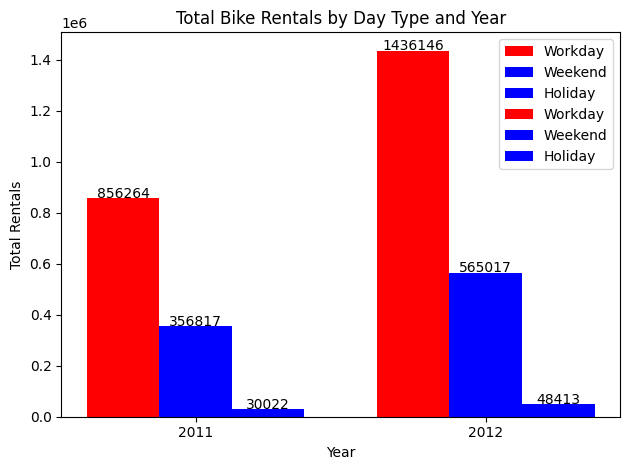

In [61]:
# Membuat data untuk visualisasi
years = rentals_by_day_type['yr'].unique()
bar_width = 0.25
index = np.arange(len(years))

# Mencari hari dengan jumlah peminjaman sepeda tertinggi di setiap tahun
max_day_type_by_year = rentals_by_day_type.loc[rentals_by_day_type.groupby('yr')['cnt'].idxmax()]

# Membuat plot untuk setiap jenis hari
for i, year in enumerate(years):
    for j, day_type in enumerate(rentals_by_day_type['day_type'].unique()):
        color = 'red' if day_type == max_day_type_by_year[max_day_type_by_year['yr'] == year]['day_type'].values[0] else 'blue'
        data = rentals_by_day_type[(rentals_by_day_type['yr'] == year) & (rentals_by_day_type['day_type'] == day_type)]
        plt.bar(index[i] + j * bar_width, data['cnt'], bar_width, label=day_type, color=color)

        # Menambahkan nilai count di atas setiap bar
        plt.text(index[i] + j * bar_width, data['cnt'].values[0] + 1000, str(data['cnt'].values[0]), ha='center')

# Menambahkan legend
plt.legend()

plt.xlabel('Year')
plt.ylabel('Total Rentals')
plt.title('Total Bike Rentals by Day Type and Year')
plt.xticks(index + bar_width, years)

plt.tight_layout()
plt.show()


Berdasarkan gambar di atas, dapat dilihat bahwa rental sepeda paling banyak ditemukan ketika sedang workday, dan paling sedikit akumulasinya ketika sedang holiday

## Conclusion

- Conclution pertanyaan 1: <br>
Pola peminjaman sepeda di Washington D.C. mengalami perubahan sepanjang musim dari tahun 2011 hingga 2012. Pada kedua tahun tersebut, jumlah peminjaman sepeda paling tinggi terjadi selama musim Fall, diikuti oleh Summer, Winter, dan paling sedikit pada musim Spring. Terdapat peningkatan yang signifikan dalam jumlah peminjaman sepeda dari tahun 2011 ke tahun 2012.

- Conclution pertanyaan 2: <br>
Cuaca memiliki pengaruh yang signifikan terhadap jumlah peminjaman sepeda di Washington D.C. Rentang cuaca yang berbeda menunjukkan pola peminjaman yang berbeda pula. Peminjaman sepeda cenderung tinggi saat cuaca cerah, menurun saat cuaca berkabut, dan sangat rendah saat cuaca bersalju.
- Conclution pertanyaan 3: <br>
Hari libur, weekend, dan hari kerja juga mempengaruhi jumlah peminjaman sepeda di Washington D.C. Secara konsisten, jumlah peminjaman sepeda paling tinggi terjadi selama hari kerja, diikuti oleh weekend, dan paling sedikit selama hari libur.



---



Menyimpan berkas data yang telah dibersihkan.

In [62]:
day_df.to_csv("day_df.csv", index=False)